### Question 1

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

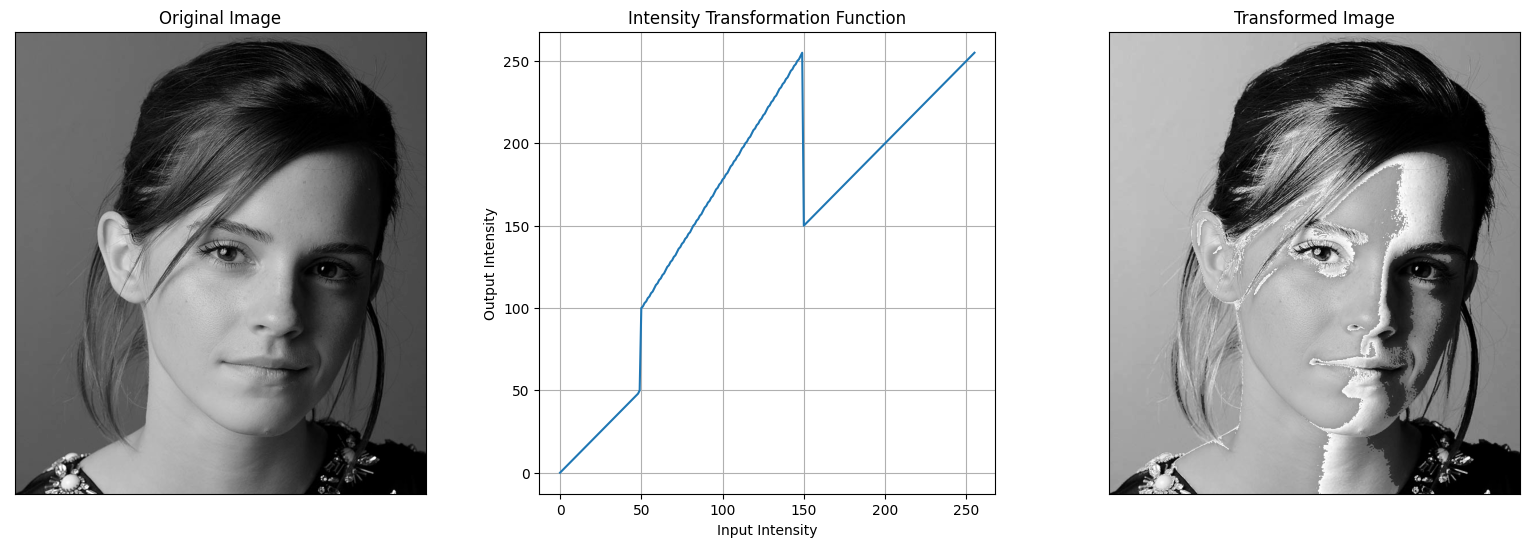

In [ ]:
# Create a custom intensity transformation curve
intensity_transform = np.concatenate((
    np.linspace(0, 50, 50),       
    np.linspace(100, 255, 100),    
    np.linspace(150, 255, 106)     
), axis=0).astype(np.uint8)

# Load the image and apply the transformation
source_image = cv.imread('a1images/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
enhanced_image = cv.LUT(source_image, intensity_transform)

# Display original image, transformation function, and enhanced result
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].get_xaxis().set_visible(False)
axes[0].get_yaxis().set_visible(False)
axes[0].set_title("Original Image")

axes[1].plot(intensity_transform)
axes[1].set_title("Intensity Transformation Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)

axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].get_xaxis().set_visible(False)
axes[2].get_yaxis().set_visible(False)
axes[2].set_title("Enhanced Image")

plt.show()

### Question 2

#### a)

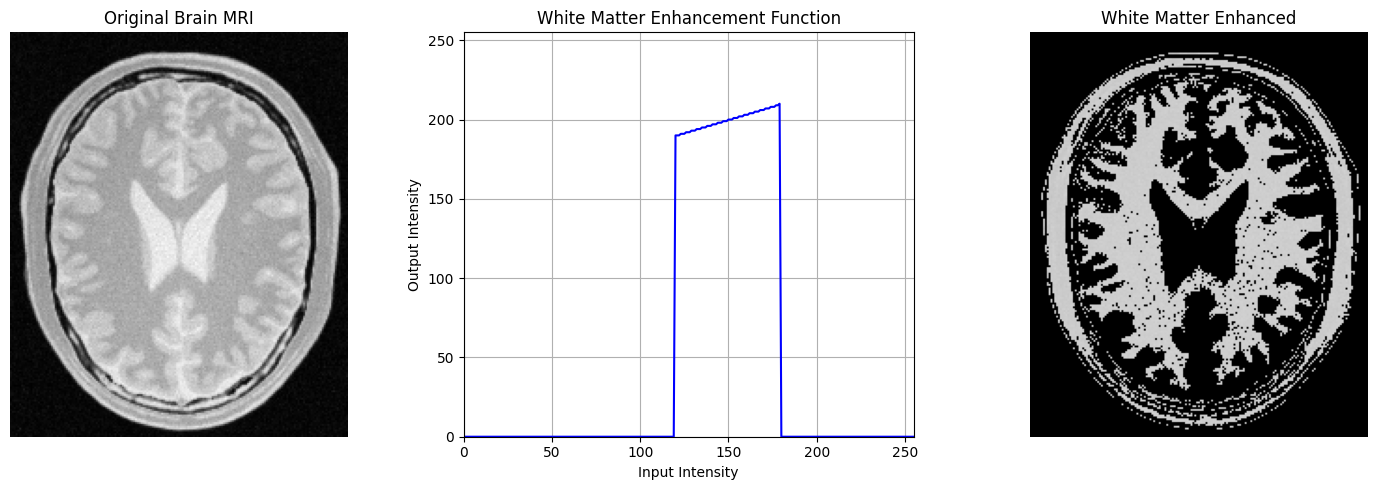

In [ ]:
# Load brain MRI image
source_image = cv.imread('a1images/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)

# Create transformation to enhance white matter (intensity range 120-180)
white_matter_transform = np.concatenate((
    np.linspace(0, 0, 120),      
    np.linspace(190, 210, 60),   
    np.linspace(0, 0, 76)        
), axis=0).astype(np.uint8)

# Apply white matter enhancement
enhanced_image = cv.LUT(source_image, white_matter_transform)

# Show original, transformation curve, and enhanced result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Brain MRI")
axes[0].set_axis_off()

axes[1].plot(white_matter_transform, color='blue')
axes[1].set_title("White Matter Enhancement Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)
axes[1].set_xlim([0, 255])
axes[1].set_ylim([0, 255])

axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("White Matter Enhanced")
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

#### b)

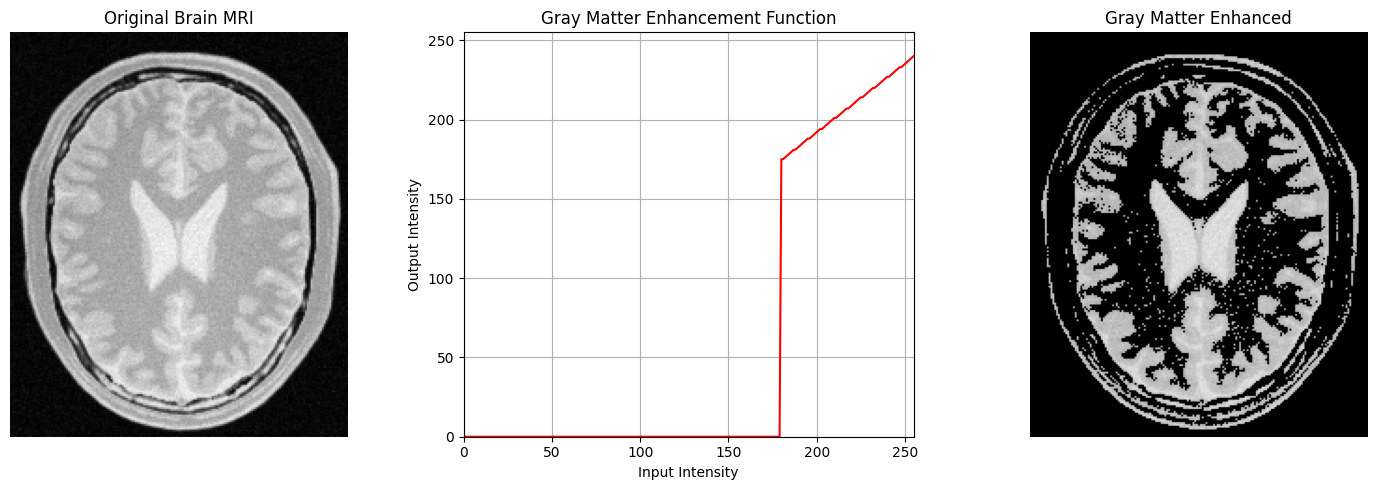

In [ ]:
# Create transformation to enhance gray matter (intensity range 180-255)
gray_matter_transform = np.concatenate((
    np.linspace(0, 0, 180),   
    np.linspace(175, 240, 76)   
), axis=0).astype(np.uint8)

# Apply gray matter enhancement
enhanced_image = cv.LUT(source_image, gray_matter_transform)

# Show original, transformation curve, and enhanced result
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(source_image, cmap="gray", vmin=0, vmax=255)
axes[0].set_title("Original Brain MRI")
axes[0].set_axis_off()

axes[1].plot(gray_matter_transform, color='red')
axes[1].set_title("Gray Matter Enhancement Function")
axes[1].set_xlabel("Input Intensity")
axes[1].set_ylabel("Output Intensity")
axes[1].grid(True)
axes[1].set_xlim([0, 255])
axes[1].set_ylim([0, 255])

axes[2].imshow(enhanced_image, cmap="gray", vmin=0, vmax=255)
axes[2].set_title("Gray Matter Enhanced")
axes[2].set_axis_off()

plt.tight_layout()
plt.show()

### Question 3


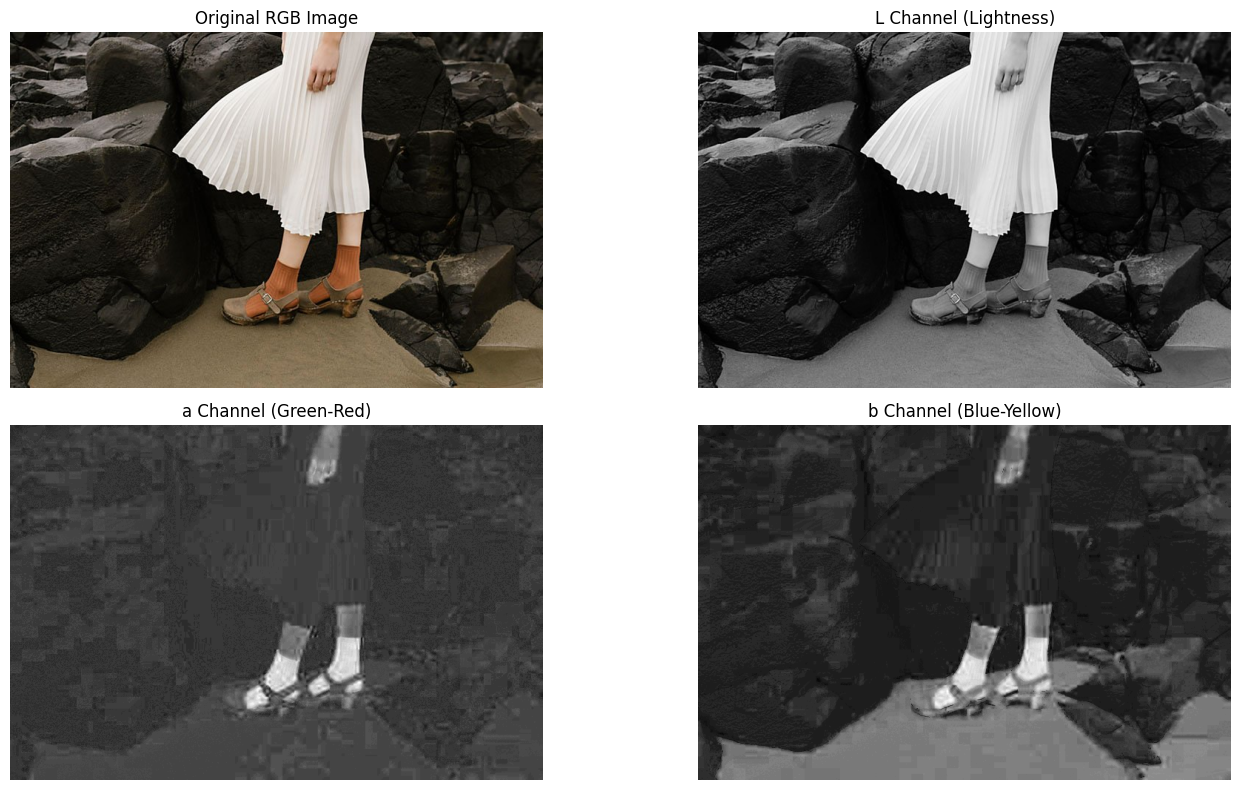

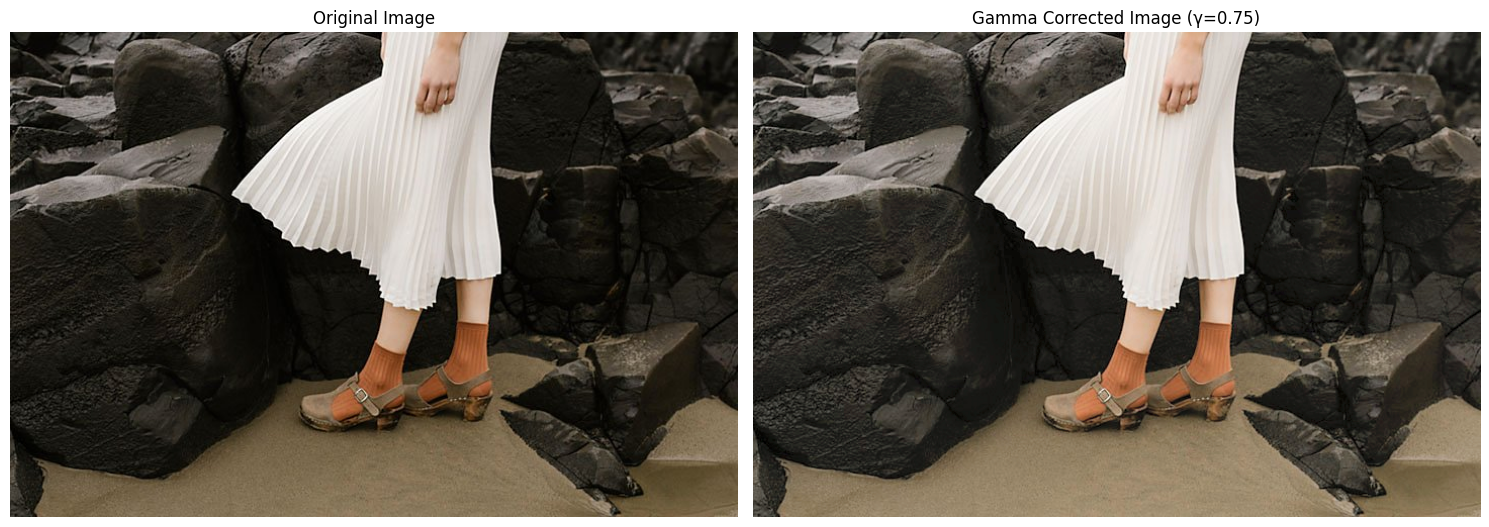

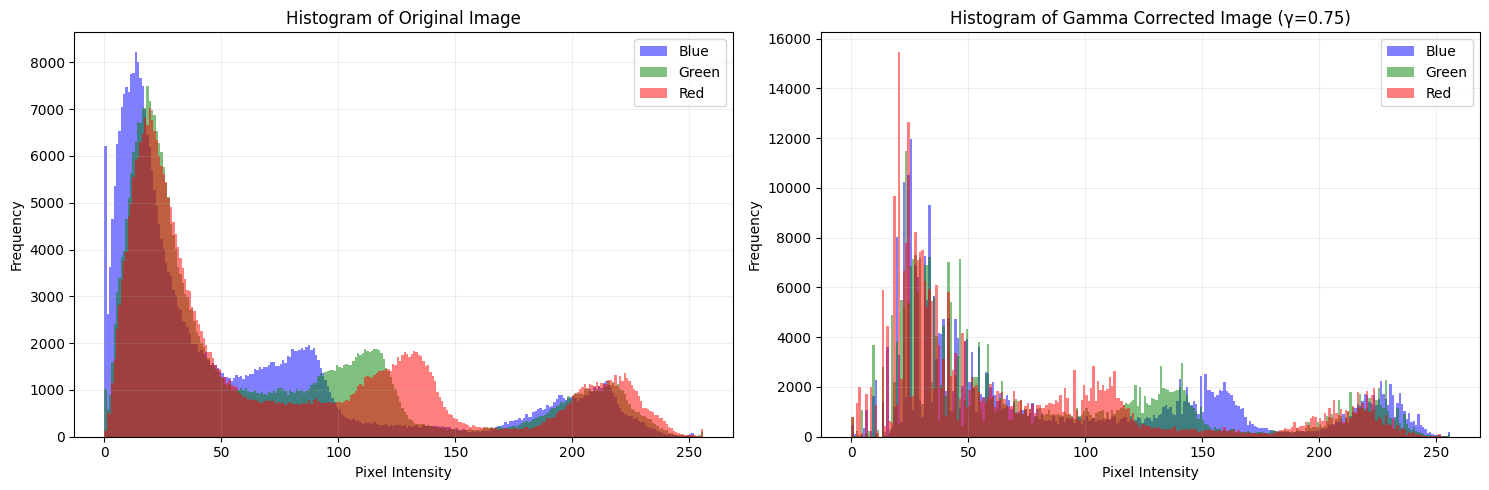

In [ ]:
# Load image and convert color spaces
source_image = cv.imread('a1images/a1images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
rgb_image = cv.cvtColor(source_image, cv.COLOR_BGR2RGB)
lab_image = cv.cvtColor(source_image, cv.COLOR_BGR2Lab)

# Split LAB color space into separate channels
l_channel, a_channel, b_channel = cv.split(lab_image)

# Display original image and LAB channels
plt.figure(figsize=(15, 8))

plt.subplot(221)
plt.imshow(rgb_image)
plt.title('Original RGB Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(l_channel, cmap='gray')
plt.title('L Channel (Lightness)')
plt.axis('off')

plt.subplot(223)
plt.imshow(a_channel, cmap='gray')
plt.title('a Channel (Green-Red)')
plt.axis('off')

plt.subplot(224)
plt.imshow(b_channel, cmap='gray')
plt.title('b Channel (Blue-Yellow)')
plt.axis('off')

plt.tight_layout()
plt.show()

# Create gamma correction lookup table
gamma_value = 0.75  
gamma_table = np.array([(i/255.0)**gamma_value * 255 for i in np.arange(0, 256)]).astype(np.uint8)

# Apply gamma correction to brightness channel only
l_channel_enhanced = cv.LUT(l_channel, gamma_table)

# Combine enhanced brightness with original color channels
lab_enhanced = cv.merge([l_channel_enhanced, a_channel, b_channel])
rgb_enhanced = cv.cvtColor(lab_enhanced, cv.COLOR_Lab2RGB)

# Compare original and enhanced images
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].imshow(rgb_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(rgb_enhanced)
axes[1].set_title(f'Gamma Enhanced Image (γ={gamma_value})')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Show histograms before and after enhancement
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(source_image[:,:,0].ravel(), bins=256, range=[0,256], color='b', alpha=0.5, label='Blue')
axes[0].hist(source_image[:,:,1].ravel(), bins=256, range=[0,256], color='g', alpha=0.5, label='Green')
axes[0].hist(source_image[:,:,2].ravel(), bins=256, range=[0,256], color='r', alpha=0.5, label='Red')
axes[0].set_title('Histogram of Original Image')
axes[0].set_xlabel('Pixel Intensity')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.2)

axes[1].hist(rgb_enhanced[:,:,0].ravel(), bins=256, range=[0,256], color='b', alpha=0.5, label='Blue')
axes[1].hist(rgb_enhanced[:,:,1].ravel(), bins=256, range=[0,256], color='g', alpha=0.5, label='Green')
axes[1].hist(rgb_enhanced[:,:,2].ravel(), bins=256, range=[0,256], color='r', alpha=0.5, label='Red')
axes[1].set_title(f'Histogram of Gamma Enhanced Image (γ={gamma_value})')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

### Question 4

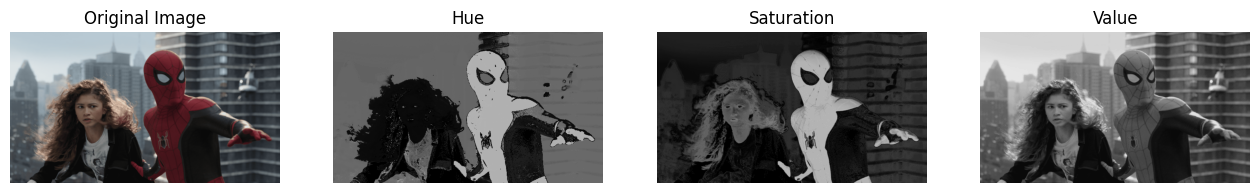

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load image and convert to proper color formats
input_image = cv.imread('a1images/a1images/spider.png')
assert input_image is not None

image_rgb = cv.cvtColor(input_image, cv.COLOR_BGR2RGB)
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)

# Split HSV into individual channels
hue_plane, saturation_plane, value_plane = cv.split(image_hsv)

# Display original image and HSV components
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image_rgb, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Image')
axes[1].imshow(hue_plane, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Hue')
axes[2].imshow(saturation_plane, cmap='gray', vmin=0, vmax=255)
axes[2].set_title('Saturation')
axes[3].imshow(value_plane, cmap='gray', vmin=0, vmax=255)
axes[3].set_title('Value')
for axis in axes:
    axis.axis('off')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from ipywidgets import interactive

# Define vibrance enhancement function using Gaussian curve
def vibrance_enhancement(intensity, strength, sigma=70):
    return int(min(intensity + (strength*128)*np.exp((-(intensity-128)**2)/(2*(sigma**2))), 255))  

# Interactive function to adjust vibrance strength
def transform(strength):
    plt.clf()
    # Create lookup table for saturation enhancement
    vibrance_table = np.array([vibrance_enhancement(x, strength) for x in np.arange(0, 256)]).astype('uint8')
    hue_channel, saturation_channel, value_channel = cv.split(image_hsv)    
    enhanced_saturation = cv.LUT(saturation_channel, vibrance_table)          
    enhanced_hsv = cv.merge((hue_channel, enhanced_saturation, value_channel))   
 
    plt.figure(figsize=(12,6))
    plt.subplot(121)
    plt.imshow(image_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(enhanced_rgb)
    plt.title('Intensity Transformed Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Create interactive slider for vibrance control
vibrance_slider = interactive(transform, strength=(0, 1, 0.001))
slider_output = vibrance_slider.children[-1]
slider_output.layout.height = '400px'
vibrance_slider

interactive(children=(FloatSlider(value=0.0, description='strength', max=1.0, step=0.001), Output(layout=Layou…

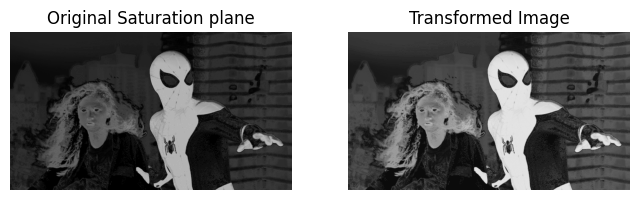

In [ ]:
# Apply specific vibrance strength and compare saturation channels
vibrance_strength = 0.48
vibrance_table = np.array([vibrance_enhancement(x, vibrance_strength) for x in np.arange(0, 256)]).astype('uint8')
hue_channel, saturation_channel, value_channel = cv.split(image_hsv)
enhanced_saturation = cv.LUT(saturation_channel, vibrance_table)

# Compare original and enhanced saturation channels
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].imshow(saturation_plane, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Original Saturation plane')
axes[1].imshow(enhanced_saturation, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Transformed Image')
for axis in axes:
    axis.axis('off')
plt.show()

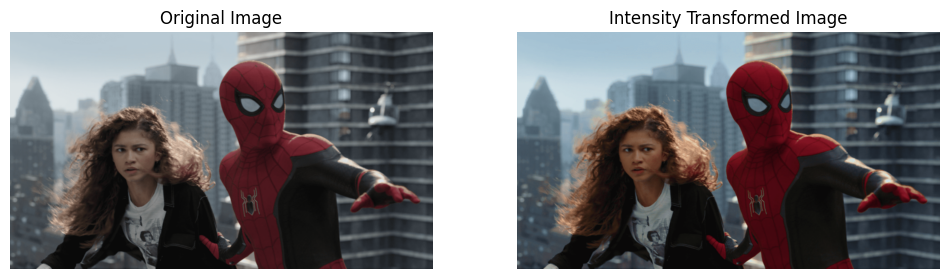

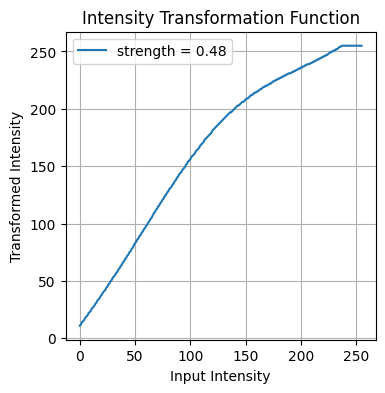

In [ ]:
# Create final enhanced image and display results
enhanced_hsv = cv.merge((hue_channel, enhanced_saturation, value_channel))  
enhanced_rgb = cv.cvtColor(enhanced_hsv, cv.COLOR_HSV2RGB)

# Show original vs enhanced image comparison
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
    
plt.subplot(122)
plt.imshow(enhanced_rgb)
plt.title('Intensity Transformed Image')
plt.axis('off')
    
plt.show()

# Display the transformation curve used
input_intensities = np.arange(0, 256)
plt.figure(figsize=(4,4))
plt.plot(input_intensities, vibrance_table, label=f'strength = {vibrance_strength}')
plt.title('Intensity Transformation Function')
plt.xlabel('Input Intensity')
plt.ylabel('Transformed Intensity')
plt.legend()
plt.grid()
    
plt.show()

### Question 5 

In [ ]:
# Manual histogram equalization function
def histogram_equalization(input_image):
    # Calculate histogram and cumulative distribution
    histogram, intensity_bins = np.histogram(input_image.ravel(), 256, [0, 256])
    cumulative_dist = histogram.cumsum()
    
    # Normalize CDF to create lookup table
    normalized_cdf = (cumulative_dist - cumulative_dist.min()) * 255 / (cumulative_dist.max() - cumulative_dist.min())
    normalized_cdf = normalized_cdf.astype('uint8')
    
    # Apply transformation using lookup table
    equalized_image = normalized_cdf[input_image]

    return equalized_image

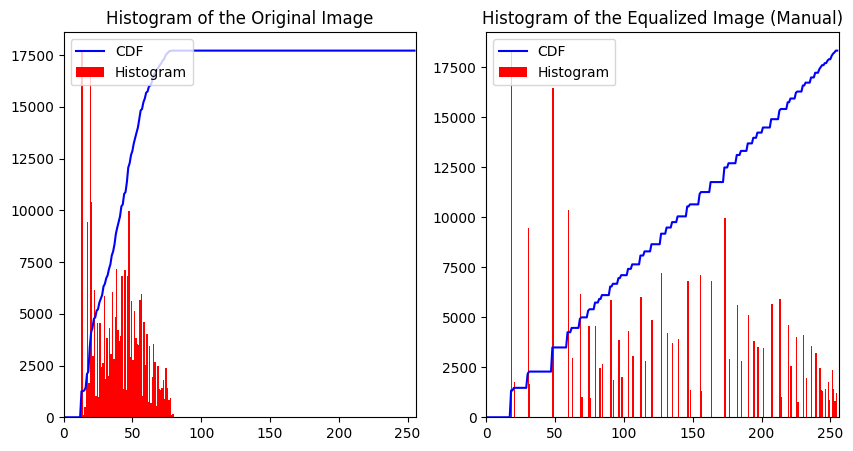

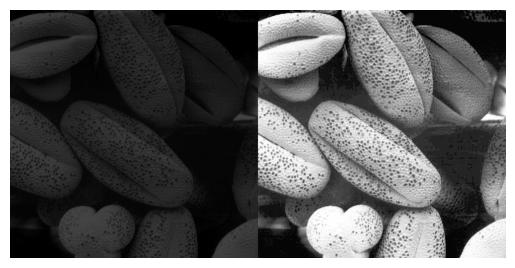

In [ ]:
# Load image and apply manual histogram equalization
input_image = cv.imread('a1images/a1images/shells.tif', cv.IMREAD_GRAYSCALE)
equalized_image = histogram_equalization(input_image)

# Calculate histograms and CDFs for visualization
original_hist, intensity_bins = np.histogram(input_image.ravel(), 256, [0, 256])
original_cdf = original_hist.cumsum()
original_cdf_normalized = original_cdf * original_hist.max() / original_cdf.max()

# Display original image histogram with CDF
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(original_cdf_normalized, color='b')
plt.hist(input_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Original Image')

# Calculate and display equalized image histogram with CDF
equalized_hist, equalized_bins = np.histogram(equalized_image.ravel(), 256, [0, 256])
equalized_cdf = equalized_hist.cumsum()
equalized_cdf_normalized = equalized_cdf * equalized_hist.max() / equalized_cdf.max()

plt.subplot(1, 2, 2)
plt.plot(equalized_cdf_normalized, color='b')
plt.hist(equalized_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.legend(('CDF', 'Histogram'), loc='upper left')
plt.title('Histogram of the Equalized Image (Manual)')
plt.show()

# Side-by-side comparison of original and equalized images
comparison = np.hstack((input_image, equalized_image))
plt.axis('off')
plt.imshow(comparison, cmap='gray')
plt.show()

### Question 6

#### a)

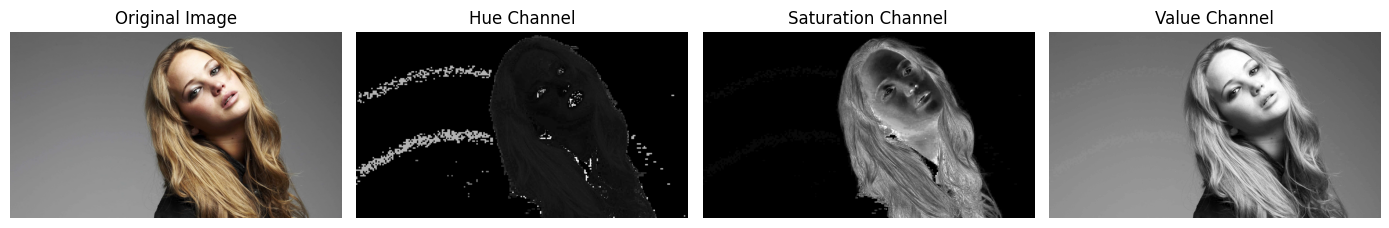

In [ ]:
# Load color image and convert to RGB and HSV
input_color_image = cv.imread('a1images/a1images/jeniffer.jpg', cv.IMREAD_COLOR)
input_rgb_image = cv.cvtColor(input_color_image, cv.COLOR_BGR2RGB)

input_hsv_image = cv.cvtColor(input_color_image, cv.COLOR_BGR2HSV)
hsv_hue, hsv_saturation, hsv_value = cv.split(input_hsv_image)

# Display original image and HSV channels
plt.figure(figsize=(14, 6))

plt.subplot(141)
plt.imshow(input_rgb_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(142)
plt.imshow(hsv_hue, cmap='gray')
plt.title('Hue Channel')
plt.axis('off')

plt.subplot(143)
plt.imshow(hsv_saturation, cmap='gray')
plt.title('Saturation Channel')
plt.axis('off')

plt.subplot(144)
plt.imshow(hsv_value, cmap='gray')
plt.title('Value Channel')
plt.axis('off')

plt.tight_layout()
plt.show()

#### b)

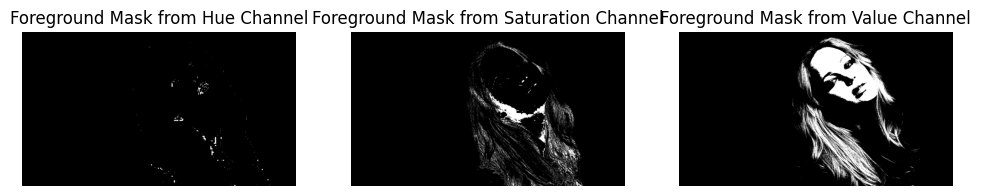

In [ ]:
# Create binary masks from each HSV channel using threshold
threshold_value = 165

_, mask_hue = cv.threshold(hsv_hue, threshold_value, 255, cv.THRESH_BINARY)
_, mask_saturation = cv.threshold(hsv_saturation, threshold_value, 255, cv.THRESH_BINARY)
_, mask_value = cv.threshold(hsv_value, threshold_value, 255, cv.THRESH_BINARY)

# Display foreground masks from each channel
plt.figure(figsize=(12,6))

plt.subplot(131)
plt.imshow(mask_hue, cmap='gray')
plt.title('Foreground Mask from Hue Channel')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_saturation, cmap='gray')
plt.title('Foreground Mask from Saturation Channel')
plt.axis('off')

plt.subplot(133)
plt.imshow(mask_value, cmap='gray')
plt.title('Foreground Mask from Value Channel')
plt.axis('off')

plt.show()

#### c)

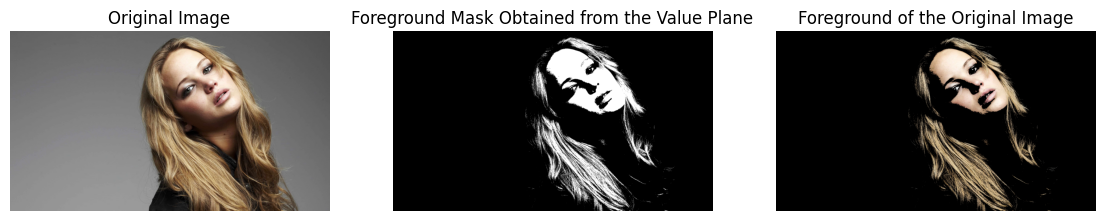

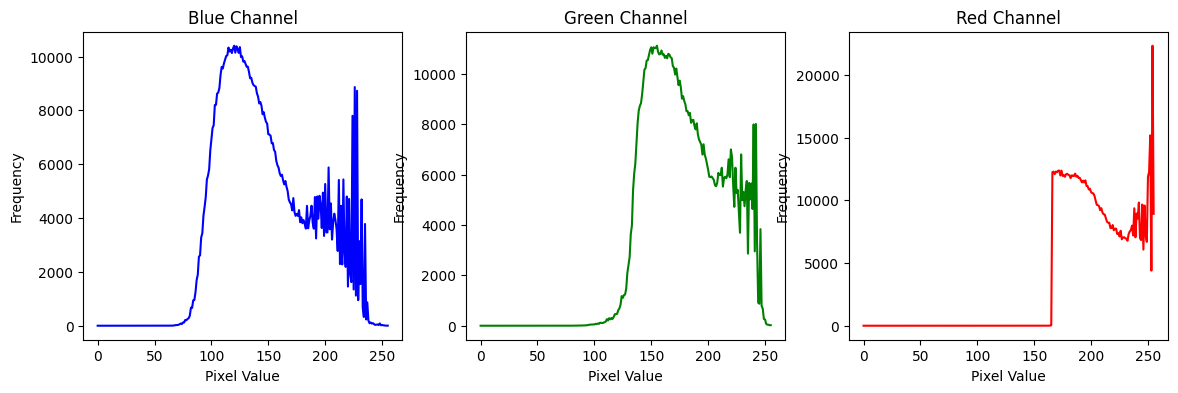

In [ ]:
# Extract foreground using value channel mask
foreground_image = cv.bitwise_and(input_color_image, input_color_image, mask=mask_value)

# Display original, mask, and extracted foreground
plt.figure(figsize=(14, 6))

plt.subplot(131)
plt.imshow(cv.cvtColor(input_color_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(mask_value, cmap='gray')
plt.title('Foreground Mask Obtained from the Value Plane')
plt.axis('off')

plt.subplot(133)
plt.imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Original Image')
plt.axis('off')

plt.show()

# Calculate histograms for each color channel of foreground
hist_blue = cv.calcHist([foreground_image], [0], mask_value, [256], [0, 256])
hist_green = cv.calcHist([foreground_image], [1], mask_value, [256], [0, 256])
hist_red = cv.calcHist([foreground_image], [2], mask_value, [256], [0, 256])

# Display histograms for each color channel
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(hist_blue, color='blue')
plt.title('Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(hist_green, color='green')
plt.title('Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(hist_red, color='red')
plt.title('Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

#### d)

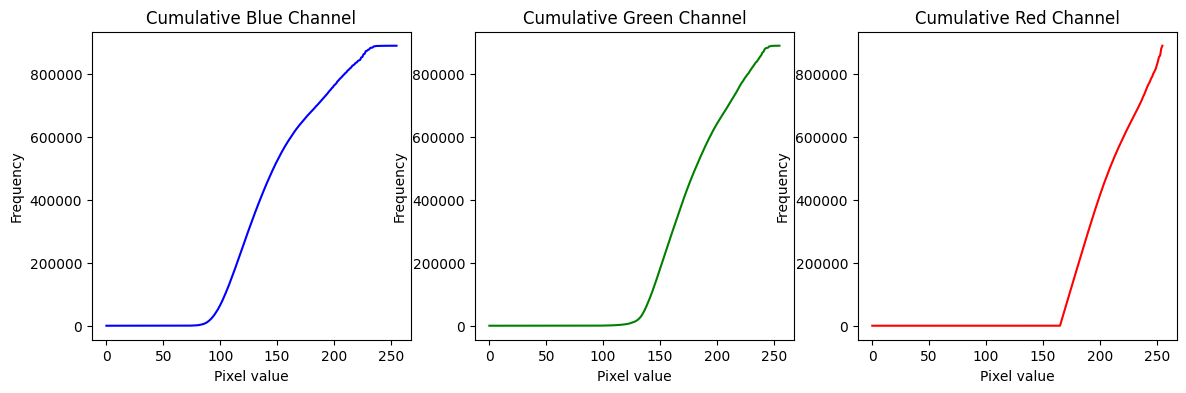

In [ ]:
# Calculate cumulative histograms for each color channel
cumulative_hist_blue = np.cumsum(hist_blue)
cumulative_hist_green = np.cumsum(hist_green)
cumulative_hist_red = np.cumsum(hist_red)

# Display cumulative distribution functions
plt.figure(figsize=(14, 4))

plt.subplot(131)
plt.plot(cumulative_hist_blue, color='blue')
plt.title('Cumulative Blue Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(cumulative_hist_green, color='green')
plt.title('Cumulative Green Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(cumulative_hist_red, color='red')
plt.title('Cumulative Red Channel')
plt.xlabel('Pixel value')
plt.ylabel('Frequency')

plt.show()

##### e)

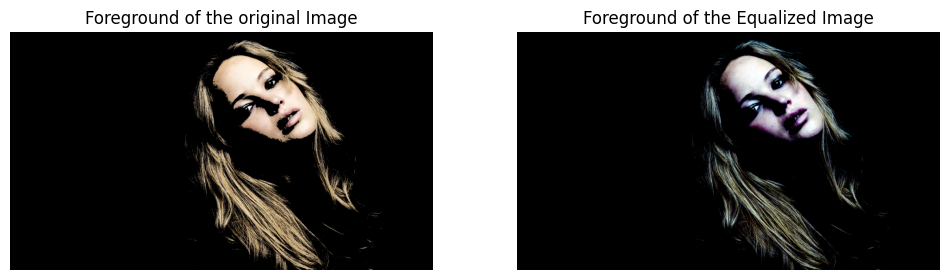

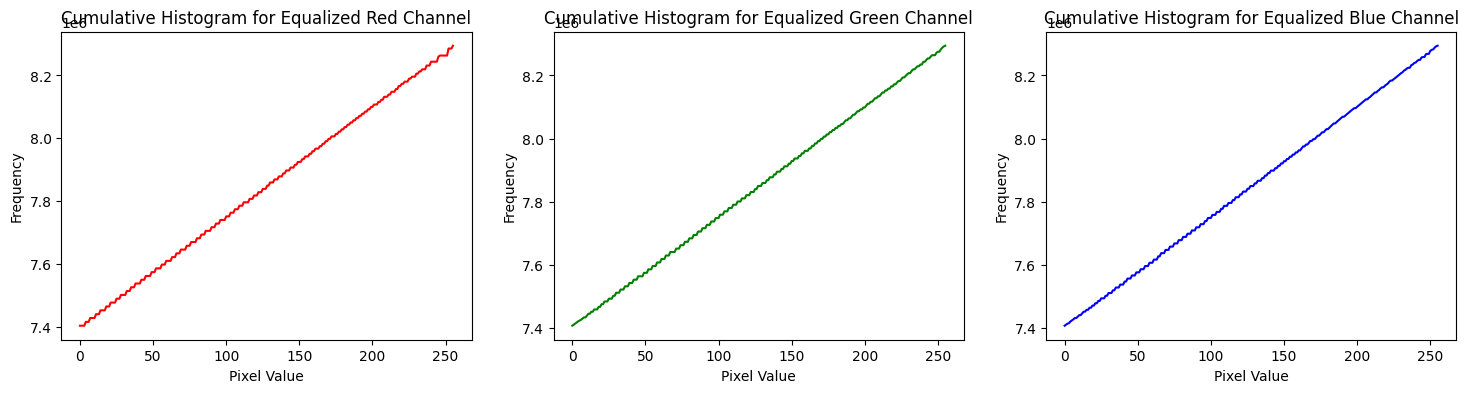

In [ ]:
# Apply histogram equalization to each color channel separately
blue_equalized = cv.equalizeHist(foreground_image[:, :, 0])
green_equalized = cv.equalizeHist(foreground_image[:, :, 1])
red_equalized = cv.equalizeHist(foreground_image[:, :, 2])

# Combine equalized channels into single image
equalized_foreground = cv.merge((blue_equalized, green_equalized, red_equalized))

# Calculate histograms and CDFs for equalized channels
hist_blue_eq = cv.calcHist([equalized_foreground], [0], None, [256], [0, 256])
hist_green_eq = cv.calcHist([equalized_foreground], [1], None, [256], [0, 256])
hist_red_eq = cv.calcHist([equalized_foreground], [2], None, [256], [0, 256])

cdf_blue_eq = np.cumsum(hist_blue_eq)
cdf_green_eq = np.cumsum(hist_green_eq)
cdf_red_eq = np.cumsum(hist_red_eq)

# Compare original and equalized foreground images
plt.figure(figsize=(12, 8))

plt.subplot(121)
plt.imshow(cv.cvtColor(foreground_image, cv.COLOR_BGR2RGB))
plt.title('Foreground of the original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.show()

# Display cumulative histograms after equalization
plt.figure(figsize=(18, 4))

plt.subplot(131)
plt.plot(cdf_red_eq, color='red')
plt.title('Cumulative Histogram for Equalized Red Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.plot(cdf_green_eq, color='green')
plt.title('Cumulative Histogram for Equalized Green Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.plot(cdf_blue_eq, color='blue')
plt.title('Cumulative Histogram for Equalized Blue Channel')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()

#### f)

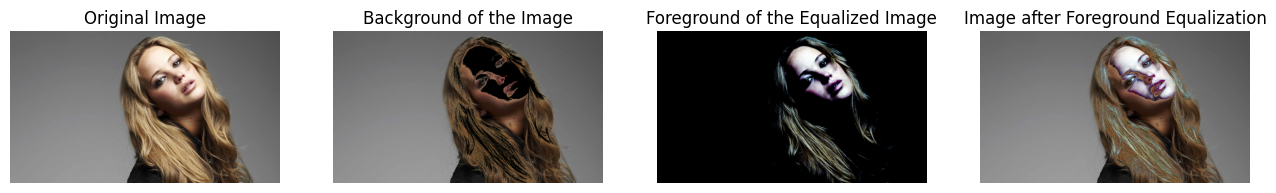

In [ ]:
# Extract background using inverted mask and combine with equalized foreground
background_image = cv.bitwise_and(input_color_image, input_color_image, mask=cv.bitwise_not(mask_value))

final_image = cv.add(background_image, equalized_foreground)
final_image_rgb = cv.cvtColor(final_image, cv.COLOR_BGR2RGB)

# Show complete processing pipeline
plt.figure(figsize=(16, 4))

plt.subplot(141)
plt.imshow(input_rgb_image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(142)
plt.imshow(cv.cvtColor(background_image, cv.COLOR_BGR2RGB))
plt.title("Background of the Image")
plt.axis('off')

plt.subplot(143)
plt.imshow(cv.cvtColor(equalized_foreground, cv.COLOR_BGR2RGB))
plt.title('Foreground of the Equalized Image')
plt.axis('off')

plt.subplot(144)
plt.imshow(final_image_rgb)
plt.title("Image after Foreground Equalization")
plt.axis('off')

plt.show()

### Question 7

#### a)

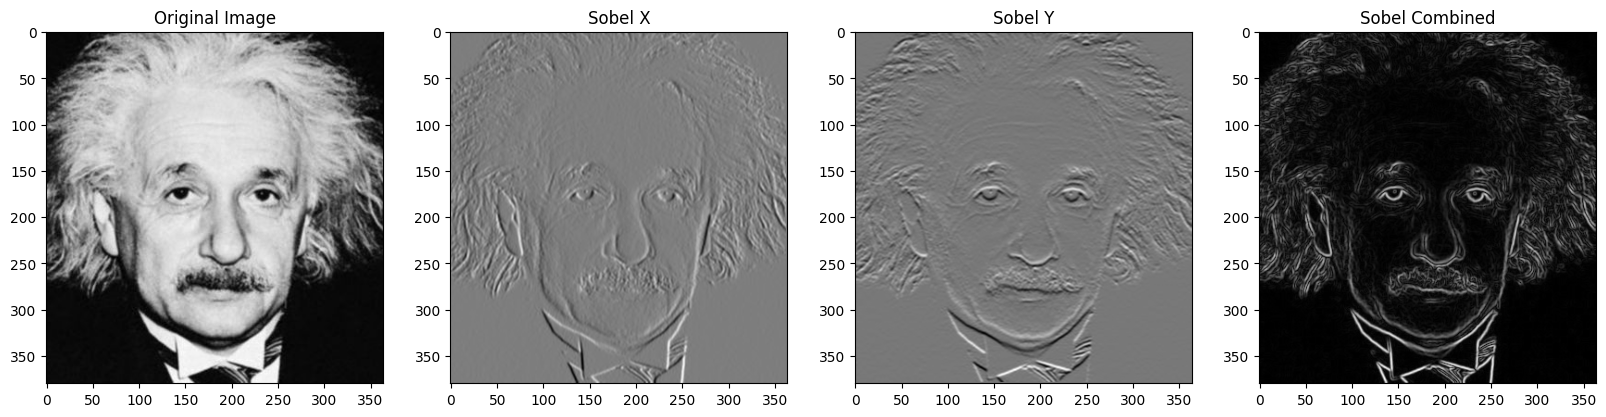

In [ ]:
# Load grayscale image for edge detection
img = cv.imread('a1images/a1images/einstein.png', cv.IMREAD_GRAYSCALE)

# Define Sobel kernels for horizontal and vertical edge detection
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

# Apply Sobel filters using OpenCV's filter2D function
sobel_x_img = cv.filter2D(img, cv.CV_64F, sobel_x)
sobel_y_img = cv.filter2D(img, cv.CV_64F, sobel_y)

# Combine horizontal and vertical gradients
sobel_combined = np.sqrt(sobel_x_img**2 + sobel_y_img**2)

# Display all results
plt.figure(figsize=(20, 8))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(sobel_x_img, cmap='gray')
plt.title('Sobel X')

plt.subplot(1, 4, 3)
plt.imshow(sobel_y_img, cmap='gray')
plt.title('Sobel Y')
plt.subplot(1, 4, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')

plt.show()

#### b)

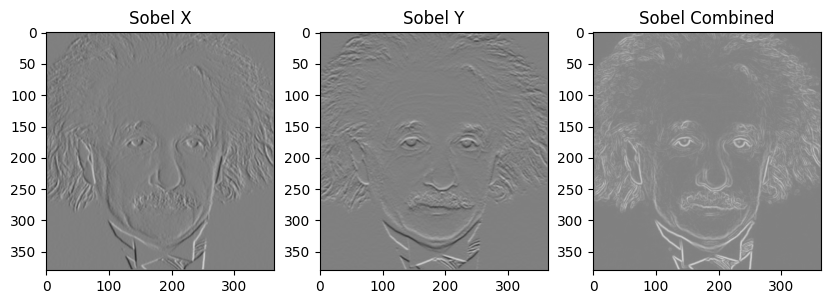

In [ ]:
# Manual implementation of Sobel filter using nested loops
def sobel_filter(img):
    sobel_x = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]])

    sobel_y = np.array([[1, 2, 1],
                        [0, 0, 0],
                        [-1, -2, -1]])

    rows, cols = img.shape
    
    # Initialize output arrays
    filtered_x = np.zeros_like(img, dtype=np.float64)
    filtered_y = np.zeros_like(img, dtype=np.float64)
    
    # Apply convolution manually pixel by pixel
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extract 3x3 neighborhood around current pixel
            region = img[i-1:i+2, j-1:j+2]
            
            # Apply Sobel kernels
            filtered_x[i, j] = np.sum(region * sobel_x)
            filtered_y[i, j] = np.sum(region * sobel_y)

    # Calculate gradient magnitude
    sobel_combined = np.sqrt(np.square(filtered_x) + np.square(filtered_y))
    
    return filtered_x, filtered_y, sobel_combined

# Apply manual Sobel filter
img = cv.imread('a1images/a1images/einstein.png', cv.IMREAD_GRAYSCALE)
sobel_x, sobel_y, sobel_combined = sobel_filter(img)

# Display results with consistent scaling
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.imshow(sobel_x, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel X')

plt.subplot(1, 3, 2)
plt.imshow(sobel_y, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel Y')

plt.subplot(1, 3, 3)
plt.imshow(sobel_combined, cmap='gray',vmin=-1020, vmax=1020)
plt.title('Sobel Combined')

plt.show()

#### c)

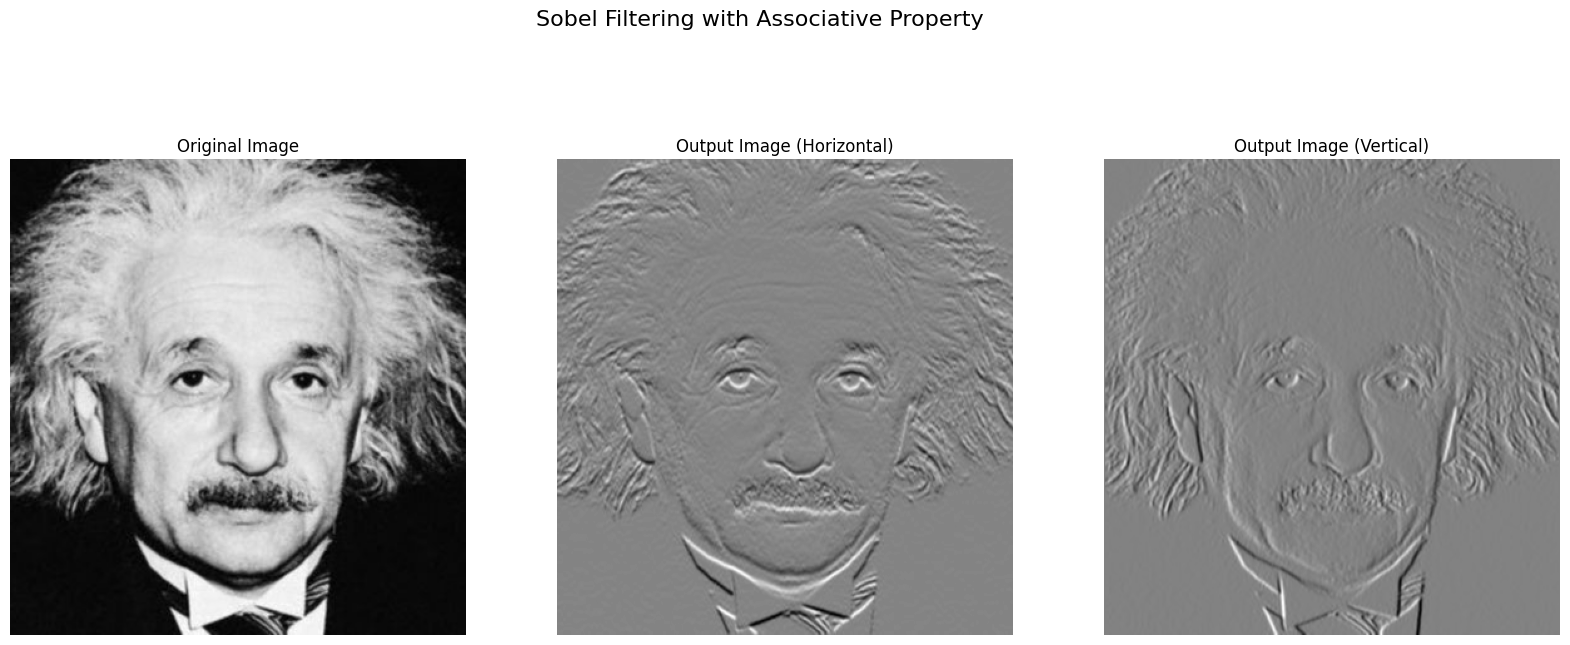

In [ ]:
# Demonstrate separable convolution using 1D kernels
kernel_1 = np.array(((-1,), (0,), (1,)))
kernel_2 = np.array((1, 2, 1))

# Apply separable convolution for horizontal gradient
output_1 = cv.filter2D(img, cv.CV_64F, kernel_1)
output_1 = cv.filter2D(output_1, cv.CV_64F, kernel_2)

# Apply separable convolution for vertical gradient
output_2 = cv.filter2D(img, cv.CV_64F, kernel_1.T)
output_2 = cv.filter2D(output_2, cv.CV_64F, kernel_2.T)

# Display results of separable convolution
plt.figure(figsize=(20, 8))
plt.suptitle('Sobel Filtering with Associative Property',fontsize=16)
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(output_1, cmap='gray')
plt.title('Output Image (Horizontal)')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(output_2, cmap='gray')
plt.title('Output Image (Vertical)')
plt.axis('off')
plt.show()

### Question 8

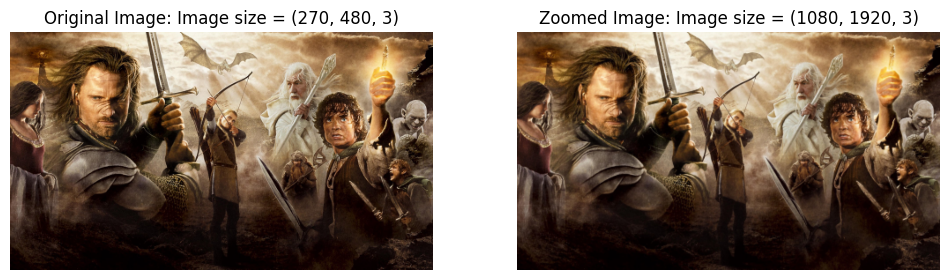

In [ ]:
# Simple image zooming using nearest neighbor interpolation
def image_zooming(image,zooming_factor):
    height,width,chanels = image.shape

    # Calculate new dimensions after zooming
    zoomed_height = int(height*zooming_factor) 
    zoomed_width = int(width*zooming_factor)

    zoomed_image = np.zeros((zoomed_height,zoomed_width,chanels),dtype=np.uint8)

    # Map each pixel in zoomed image to nearest pixel in original
    for i in range(zoomed_height):
        for j in range(zoomed_width):
            x = int(i/zooming_factor)
            y = int(j/zooming_factor)
            zoomed_image[i,j] = image[x,y]

    return zoomed_image

# Load small image and apply 4x zooming
image = cv.imread('a1images/a1images/a1q5images/im01small.png', cv.IMREAD_COLOR)
zooming_factor = 4
zoomed_image = image_zooming(image, zooming_factor)

# Compare original and zoomed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title(f'Original Image: Image size = {image.shape}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(zoomed_image, cv.COLOR_BGR2RGB))
plt.title(f'Zoomed Image: Image size = {zoomed_image.shape}')
plt.axis('off')

plt.show()

In [ ]:
# Function to calculate sum of squared differences between two images
def sum_of_squared_difference(image1, image2):
    ssd = np.sum((image1 - image2) ** 2)
    return ssd

In [ ]:
# Compare zoomed image with actual large image using SSD
Large_image = cv.imread('a1images/a1images/a1q5images/im01.png', cv.IMREAD_COLOR)
print(f"SSD value between original and zoomed images is {sum_of_squared_difference(Large_image, zoomed_image)}")

SSD value between original and zoomed images is 194613476


In [ ]:
# Advanced image zooming using bilinear interpolation
def fn(image, zoom_factor):
    height, width, channels = image.shape
    
    # Calculate new image dimensions
    new_height = int(height * zoom_factor)
    new_width = int(width * zoom_factor)
    
    new_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
    
    # Calculate scaling factors
    scale_height = height / new_height
    scale_width = width / new_width
    
    # Apply bilinear interpolation for each pixel
    for i in range(new_height):
        for j in range(new_width):
            # Find corresponding position in original image
            x = i * scale_height
            y = j * scale_width
            
            # Get surrounding pixel coordinates
            x0 = int(x)
            x1 = min(x0 + 1, height - 1)
            y0 = int(y)
            y1 = min(y0 + 1, width - 1)
            
            # Calculate interpolation weights
            dx = x - x0
            dy = y - y0
            
            # Perform bilinear interpolation
            new_image[i, j] = (1 - dx) * (1 - dy) * image[x0, y0] + dx * (1 - dy) * image[x1, y0] + (1 - dx) * dy * image[x0, y1] + dx * dy * image[x1, y1]
    
    return new_image

In [ ]:
# Test bilinear interpolation on different image
image2 = cv.imread('a1images/a1images/a1q5images/im03small.png', cv.IMREAD_COLOR)
print(image2.shape)
zoom_image_by = fn(image2, 4)

(365, 600, 3)


(1460, 2400, 3)


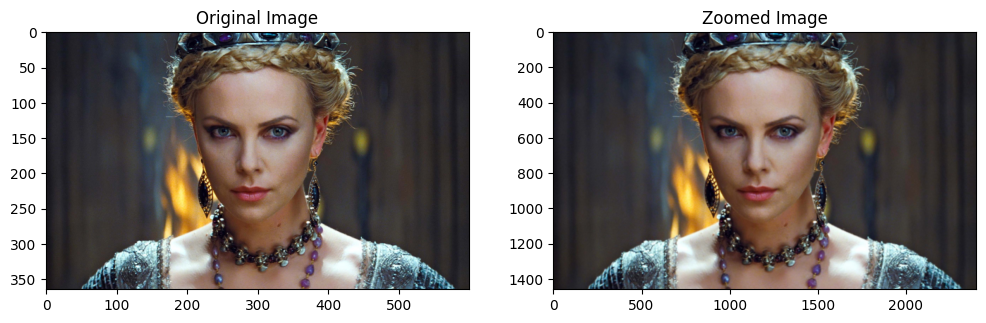

In [ ]:
# Display comparison of original and bilinear interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image2, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(zoom_image_by, cv.COLOR_BGR2RGB))
plt.title('Zoomed Image')

print(zoom_image_by.shape)

### Question 9

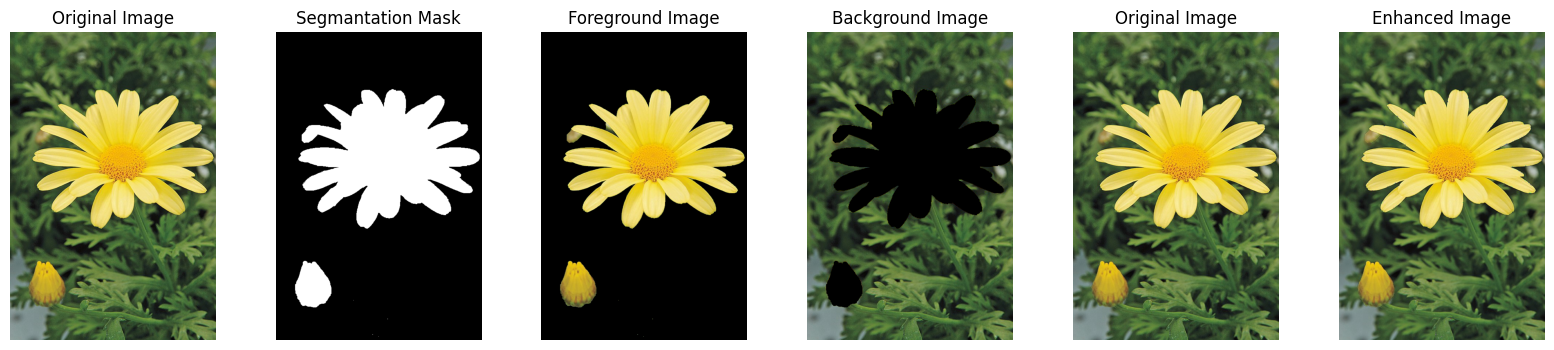

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load daisy image for foreground/background segmentation
daisy_image = cv.imread('a1images/a1images/daisy.jpg', cv.IMREAD_COLOR)

# Initialize GrabCut algorithm parameters
foreground_mask = np.zeros(daisy_image.shape[:2], np.uint8)
foreground_model = np.zeros((1, 65), np.float64)
background_model = np.zeros((1, 65), np.float64)

# Define rectangle around main subject (daisy)
rectangle = (50,50, daisy_image.shape[1] - 50, daisy_image.shape[0] - 50)                                 

# Apply GrabCut algorithm for automatic segmentation
cv.grabCut(daisy_image, foreground_mask, rectangle, background_model, foreground_model, 5, cv.GC_INIT_WITH_RECT)   

# Create binary mask from GrabCut result
new_mask = np.where((foreground_mask == 2) | (foreground_mask == 0), 0, 1).astype('uint8')                            

# Separate foreground and background using the mask
foreground_img = daisy_image * new_mask[:, :, np.newaxis]
background_img = daisy_image * (1 - new_mask[:, :, np.newaxis])

# Apply blur effect to background only
background_blurred_img = cv.GaussianBlur(background_img, (3, 3), 0)                           

# Combine sharp foreground with blurred background
enhanced_img = foreground_img + background_blurred_img                                          

# Display complete processing pipeline
plt.figure(figsize=(20, 4))

plt.subplot(161)
plt.imshow(cv.cvtColor(daisy_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(162)
plt.imshow(new_mask, cmap='gray')
plt.title('Segmantation Mask')
plt.axis('off')

plt.subplot(163)
plt.imshow(cv.cvtColor(foreground_img, cv.COLOR_BGR2RGB))
plt.title('Foreground Image')
plt.axis('off')

plt.subplot(164)
plt.imshow(cv.cvtColor(background_img, cv.COLOR_BGR2RGB))
plt.title('Background Image')
plt.axis('off')

plt.subplot(165)
plt.imshow(cv.cvtColor(daisy_image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(166)
plt.imshow(cv.cvtColor(enhanced_img, cv.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

plt.show()